In [1]:
%matplotlib inline
import pandas as pd
import altair as alt
import numpy as np
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

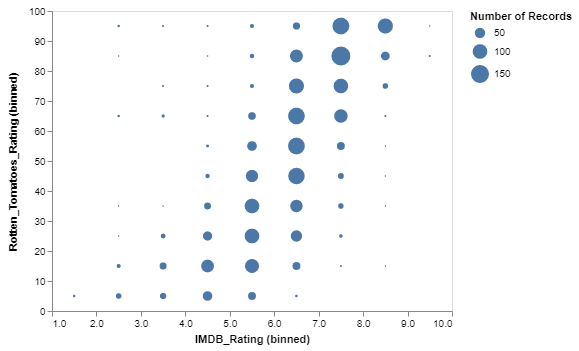

In [2]:
# Dot Plot
source = data.movies.url

alt.Chart(source).mark_circle().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=True),
    size='count()'
)

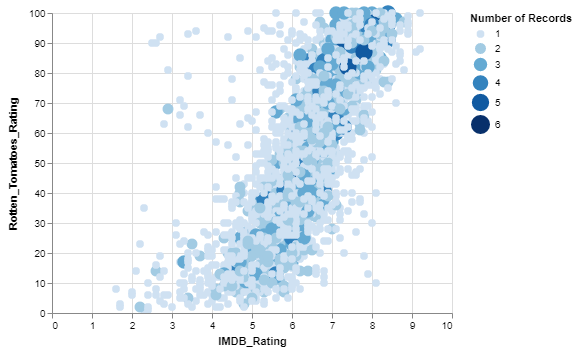

In [4]:
# Dot Plot
source = data.movies.url

alt.Chart(source).mark_circle().encode(
    alt.X('IMDB_Rating:Q', bin=False),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=False),
    size='count()', color='count()'
)

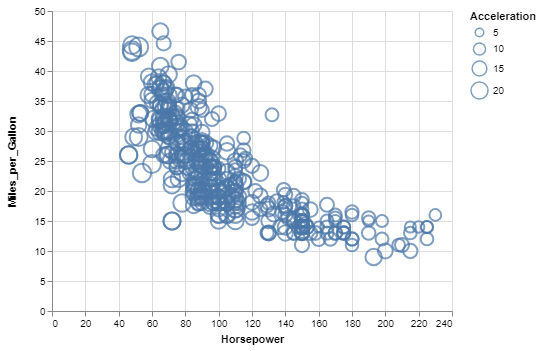

In [5]:
# Scatter plot
source = data.cars()

alt.Chart(source).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    size='Acceleration'
)

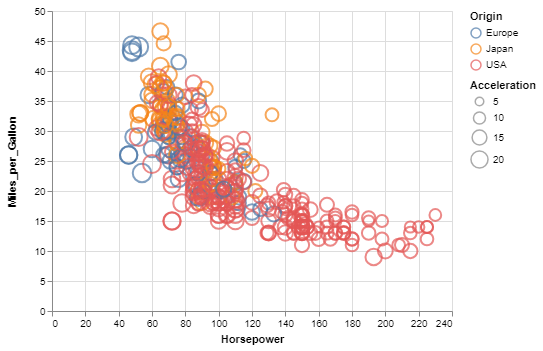

In [6]:
# Scatter plot
source = data.cars()

alt.Chart(source).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    size='Acceleration',
    color='Origin'
)

# Dot Dash Plot

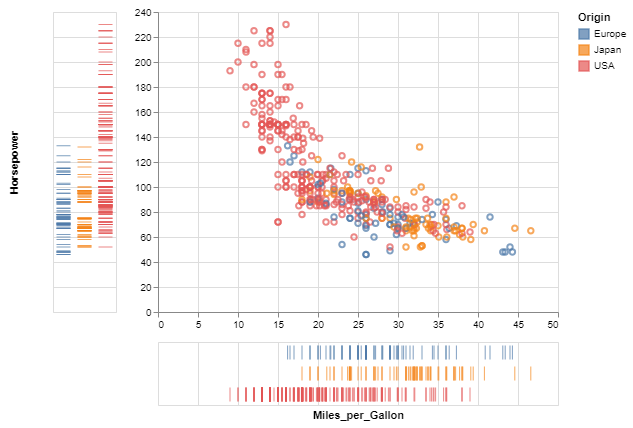

In [7]:
source = data.cars()

# Configure the options common to all layers
brush = alt.selection(type='interval')
base = alt.Chart(source).add_selection(brush)

# Configure the points
points = base.mark_point().encode(
    x=alt.X('Miles_per_Gallon', axis=alt.Axis(title='')),
    y=alt.Y('Horsepower', axis=alt.Axis(title='')),
    color=alt.condition(brush, 'Origin', alt.value('grey'))
)

# Configure the ticks
tick_options = dict(labels=False, domain=False, ticks=False)
tick_axis = alt.Axis(**tick_options)
tick_axis_notitle = alt.Axis(title='', **tick_options)

x_ticks = base.mark_tick().encode(
    alt.X('Miles_per_Gallon', axis=tick_axis),
    alt.Y('Origin', axis=tick_axis_notitle),
    color=alt.condition(brush, 'Origin', alt.value('lightgrey'))
)

y_ticks = base.mark_tick().encode(
    alt.X('Origin', axis=tick_axis_notitle),
    alt.Y('Horsepower', axis=tick_axis),
    color=alt.condition(brush, 'Origin', alt.value('lightgrey'))
)

# Build the chart
y_ticks | (points & x_ticks)

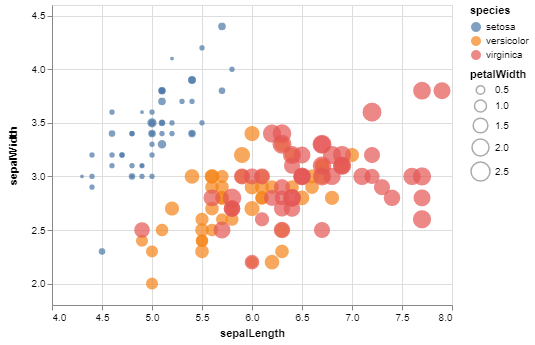

In [8]:
source = data.iris()

alt.Chart(source).mark_circle().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)),
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petalWidth'
)


# Scatter Matrix

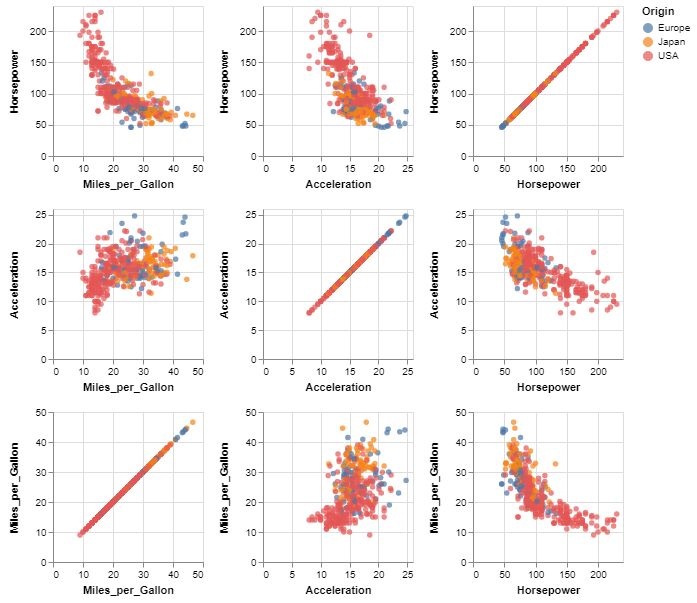

In [10]:
source = data.cars()

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Horsepower', 'Acceleration', 
         'Miles_per_Gallon'],
    column=['Miles_per_Gallon', 
            'Acceleration', 'Horsepower']
).interactive()

# Scatterplot with labels

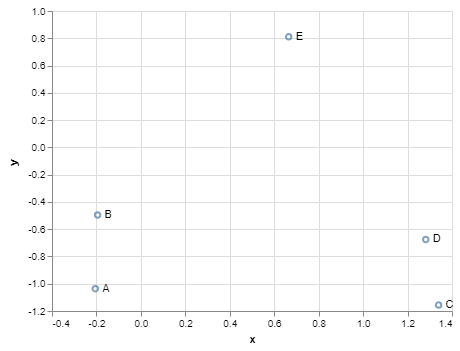

In [11]:
source = pd.DataFrame({
    'x': np.random.randn(5),
    'y': np.random.randn(5),
    'label': ['A', 'B', 'C', 'D', 'E']
})

bars = alt.Chart(source).mark_point().encode(
    x='x:Q',
    y='y:Q'
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='label'
)

bars + text

# Github punch Card

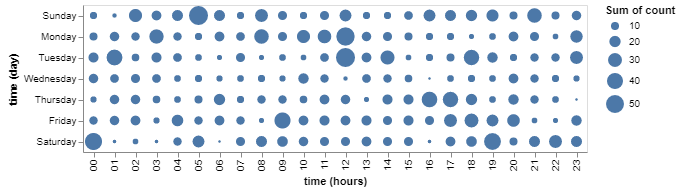

In [12]:
source = data.github.url

alt.Chart(source).mark_circle().encode(
    x='hours(time):O',
    y='day(time):O',
    size='sum(count):Q'
)

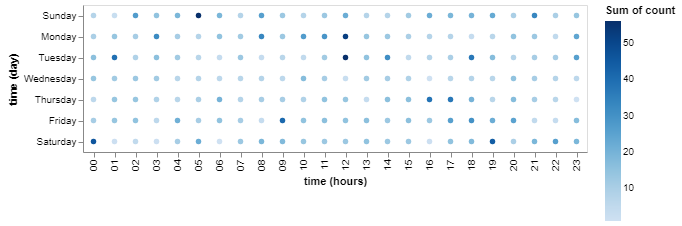

In [17]:
source = data.github.url

alt.Chart(source).mark_circle().encode(
    x='hours(time):O',
    y='day(time):O',
#    size='sum(count):Q',
    color='sum(count):Q'
)

# Trellis Scatter Plot

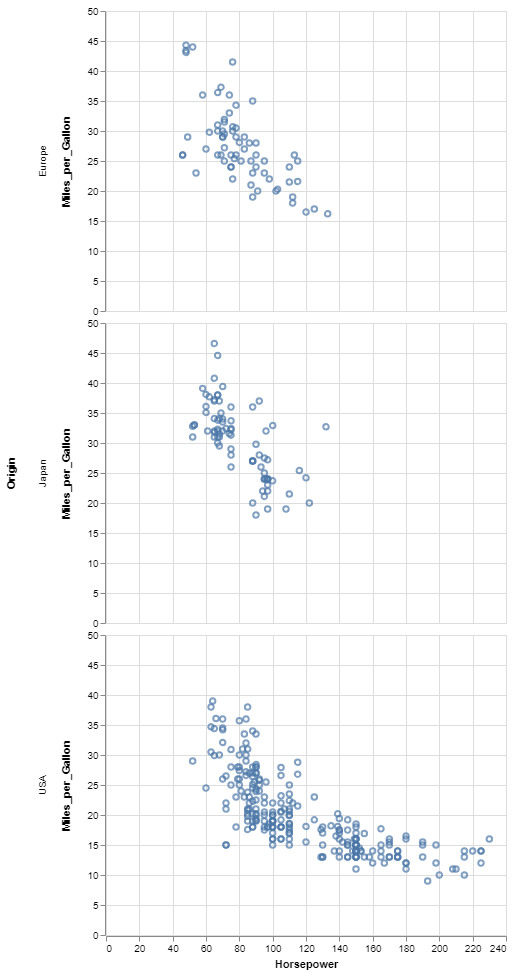

In [18]:
source = data.cars()

alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    row='Origin:N'
)

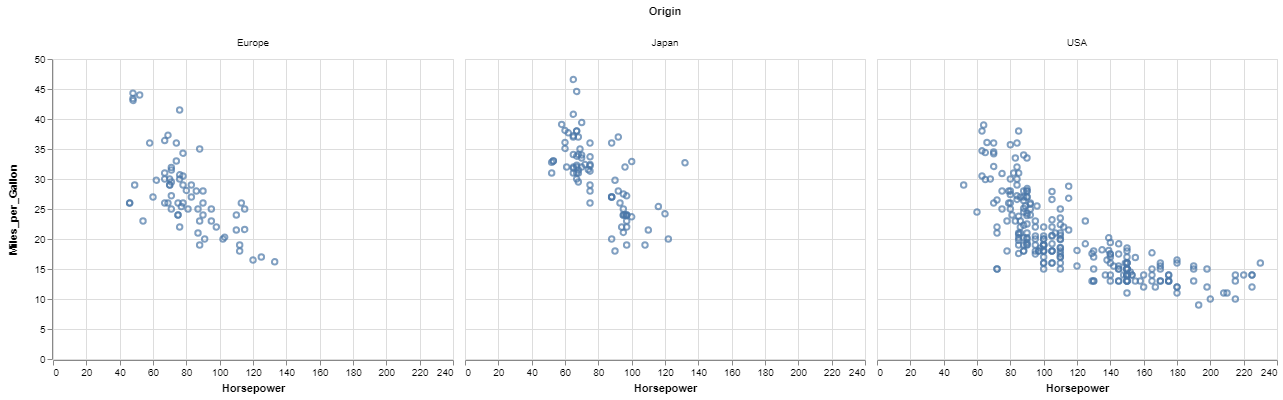

In [19]:
source = data.cars()

alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    column='Origin:N'
)